A Carpentry style lesson on machine learning with Python and scikit-learn
The Carpentries Incubator

https://carpentries-incubator.github.io/machine-learning-novice-sklearn/

In [32]:
import math
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lin
import sklearn.metrics as skl_metrics
import sklearn.preprocessing as skl_pre
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

# Regression

## Coding a linear regression 

In [5]:
def least_squares(data):
    x_sum = 0
    y_sum = 0
    x_sq_sum = 0
    xy_sum = 0
    
    # the list of data should have two equal length columns
    assert len(data[0]) == len(data[1])
    assert len(data) == 2
    
    n = len(data[0])
    # least squares regression calculation
    for i in range(0,n):
        x = data[0][i]
        y = data[1][i]
        x_sum = x_sum + x
        y_sum = y_sum + y
        x_sq_sum = x_sq_sum + (x**2)
        xy_sum = xy_sum + (x*y)
        
    m = ((n * xy_sum) - (x_sum * y_sum))
    m = m / ((n * x_sq_sum) - (x_sum **2))
    c = (y_sum - m * x_sum) / n
    
    print('Results of linear regression:')
    print('x_sum=', x_sum, 'y_sum=', y_sum, 'x_sq_sum=', x_sq_sum, 'xy_sum=',
         xy_sum)
    print('m=', m, 'c=', c)
    
    return m,c

In [9]:
# example data
x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]
least_squares([x_data,y_data])

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


(1.5182926829268293, 0.30487804878048763)

## Test the accuracy of a linear regression model

In [6]:
def measure_error(data1, data2):
    assert len(data1) == len(data2)
    err_total = 0
    for i in range(0, len(data1)):
        err_total = err_total + (data1[i] - data2[i]) **2
        
    err = math.sqrt(err_total / len(data1))
    return err

In [14]:
# get the m and c values from the least_squares function
m, c = least_squares([x_data, y_data])

# create an empty list for the model y data
linear_data = []

for x in x_data:
    y = m*x + c
    # add the result to the linear_data list
    linear_data.append(y)
    
# calculate the error
print(measure_error(y_data,linear_data))

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763
0.7986268703523449


## Graph the Data

In [18]:
def make_linear(x_data, m, c):
    linear_data = []
    for x in x_data:
        y = m*x + c
        # add the result to the linear_data list
        linear_data.append(y)
    return(linear_data)

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


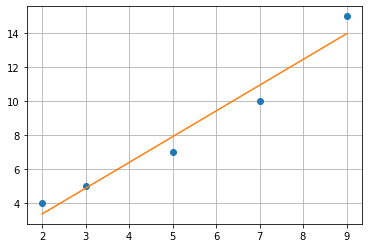

In [7]:


x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]

m, c = least_squares([x_data, y_data])
linear_data = make_linear(x_data, m, c)

plt.plot(x_data,y_data,'o')
plt.plot(x_data,make_linear(x_data, m,c))
plt.grid()

# Predicting Life Expectancy

In [11]:
def process_life_expectancy_data(filename, country, min_date, max_date):
    
    df = pd.read_csv(filename, index_col="Life expectancy")
    
    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df.loc[country, str(min_date):str(max_date)]
    
    # create a list with the numerical range of min_date to max_date
    # we could use the index of life_expectancy but it will be a string
    # we need numerical data
    x_data = list(range(min_date, max_date+1))
    
    # calculate a line of best fit
    m, c = least_squares([x_data, life_expectancy])
    linear_data = make_linear(x_data, m, c)
    
    error = measure_error(life_expectancy, linear_data)
    print('Error is ', error)
    
    plt.plot(x_data,life_expectancy,'o')
    plt.plot(x_data,make_linear(x_data, m,c))
    plt.grid()


Results of linear regression:
x_sum= 120780 y_sum= 4546.599999999999 x_sq_sum= 239163310 xy_sum= 9006753.530000001
m= 0.23720412480183278 c= -395.12974087812074
Error is  0.3958118239003424


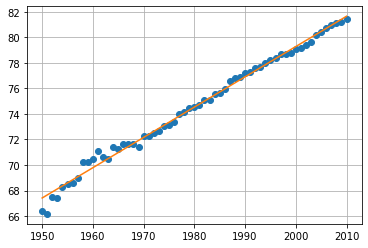

In [14]:
process_life_expectancy_data("./data/gapminder-life-expectancy.csv",
                            'France', 1950, 2010)

Results of linear regression:
x_sum= 47550 y_sum= 1228.96 x_sq_sum= 90441400 xy_sum= 2337962.67
m= 0.3698076923076923 c= -654.2158307692308
Error is  0.12913371722008962


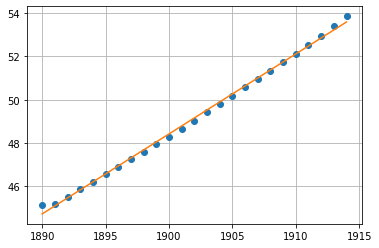

In [16]:
# predict life expectancy in Canada

process_life_expectancy_data("./data/gapminder-life-expectancy.csv",
                            'Canada', 1890, 1914)

In [21]:
# predict in 1918
print("Predicted: ", 0.3698076923076923 * 1918 - 654.2158307692308)

df = pd.read_csv('./data/gapminder-life-expectancy.csv', index_col="Life expectancy")

print('Actual: ', df.loc['Canada', '1918'])

Predicted:  55.07532307692293
Actual:  47.17


# Log Regression


In [9]:
def read_data(gdp_file, life_expectancy_file, year):
    df_gdp = pd.read_csv(gdp_file, index_col = 'Country Name')
    
    gdp = df_gdp.loc[:,year]
    
    df_life_extp = pd.read_csv(life_expectancy_file,
                              index_col='Life expectancy')
    
    #get the life expectancy for the specified country/dates
    # we have to convert the dates to strings for pandas
    life_expectancy = df_life_extp.loc[:,year]
    
    data = []
    
    for country in life_expectancy.index:
        if country in gdp.index:
            # exclude any country were data is unknown
            if (math.isnan(life_expectancy[country]) is False) and \
                (math.isnan(gdp[country]) is False):
                data.append((country, life_expectancy[country], gdp[country]))
            else:
                pass
                #print('Excluding ', country, ',NaN in data(life_exp = ',
                      #life_expectancy[country], 'gdp=', gdp[country], ')')
        else:
            pass
            #print(country, 'is not in the GDP country data')
    
    combined = pd.DataFrame.from_records(data, columns=('Country',
                                                       'Life Expectancy',
                                                       'GDP'))
    combined = combined.set_index('Country')
    
    # we will need sorted data for graphing properly later on
    combined = combined.sort_values('Life Expectancy')
    return combined

In [10]:
def process_data(gdp_file, life_expectancy_file, year):
    data = read_data(gdp_file, life_expectancy_file, year)

    gdp = data["GDP"].tolist()
    gdp_log = data["GDP"].apply(math.log).tolist()
    life_exp = data["Life Expectancy"].tolist()

    m, c = least_squares([life_exp, gdp_log])

    # list for logarithmic version
    log_data = []
    # list for raw version
    linear_data = []
    for x in life_exp:
        y_log = m * x + c
        log_data.append(y_log)

        y = math.exp(y_log)
        linear_data.append(y)

    # uncomment for log version, further changes needed in make_graph too
    # make_graph(life_exp, gdp_log, log_data)
    #make_graph(life_exp, gdp, linear_data)
    plt.figure(1)
    plt.plot(life_exp, gdp, 'o')
    plt.plot(life_exp,linear_data,'r')
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(life_exp, gdp_log, 'o')
    plt.plot(life_exp,log_data,'r')
    plt.grid()

    err = measure_error(linear_data, gdp)
    print("error=", err)

Results of linear regression:
x_sum= 8062.49 y_sum= 1038.8012920046422 x_sq_sum= 518936.5179 xy_sum= 66838.6234100167
m= 0.12676223836506617 c= 0.13110947506781123
error= 8741.124994224838


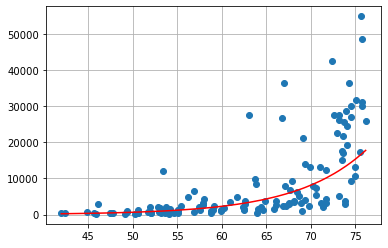

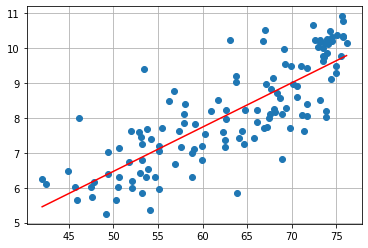

In [11]:
process_data('./data/worldbank-gdp.csv',
            './data/gapminder-life-expectancy.csv',
            '1980')

### Try removing some of the outliers 

In [124]:
def process_remove_data(gdp_file, life_expectancy_file, year):
    data = read_data(gdp_file, life_expectancy_file, year)

    gdp = data["GDP"].tolist()
    gdp_log = data["GDP"].apply(math.log).tolist()
    life_exp = data["Life Expectancy"].tolist()

    m, c = least_squares([life_exp, gdp_log])

    # list for logarithmic version
    log_data = []
    
    # list for raw version
    linear_data = []
    for x in life_exp:
        y_log = m * x + c
        log_data.append(y_log)

        y = math.exp(y_log)
        linear_data.append(y)

    
    # detect outliers, remove based on IQR, and refit
    
    linear_residuals = np.array(gdp) - np.array(linear_data)
    
    # IQR
    Q1 = np.percentile(linear_residuals, 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(linear_residuals, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    
    # Upper bound
    upper = np.where(linear_residuals >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(linear_residuals <= (Q1-1.5*IQR))
 
    # Removing the Outliers
    #print('Upper', upper)
    gdp_outliers = pd.DataFrame(gdp) #turn into dataframe
    gdp_outliers.drop(upper[0], inplace = True) #remove upper outliers
    gdp_outliers.drop(lower[0], inplace = True) #remove lower outliers
    
    life_exp_outliers = pd.DataFrame(life_exp)
    life_exp_outliers.drop(upper[0], inplace = True) #remove upper outliers
    life_exp_outliers.drop(lower[0], inplace = True) #remove lower outliers
    
    # new values are gdp_outliers, life_exp_outliers
    gdp_new = gdp_outliers[0].tolist()
    gdp_new_log = gdp_outliers[0].apply(math.log).tolist()
    life_exp_new = life_exp_outliers[0].tolist()
    
    
    # Refit data
    m_refit, c_refit = least_squares([life_exp_new, 
                                      gdp_new_log])

    # list for logarithmic version
    log_data_refit = []
    
    # list for raw version
    linear_data_refit = []
    
    for x in life_exp_new:
        y_log_refit = m_refit * x + c_refit
        log_data_refit.append(y_log_refit)
        #print(y_log_refit)
        y_refit = math.exp(y_log_refit)
        linear_data_refit.append(y_refit)
    
    
    # Plot the results
    # show the removed data in black and the refitted line in black
    plt.figure(1)
    plt.plot(life_exp, gdp, 'ko')
    plt.plot(life_exp_new,gdp_new,'bo')
    plt.plot(life_exp,linear_data,'r',linewidth=4)
    plt.plot(life_exp_new,linear_data_refit,'k',linewidth=4)
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(life_exp, gdp_log, 'ko')
    plt.plot(life_exp_new, gdp_new_log, 'bo')
    plt.plot(life_exp,log_data,'r',linewidth=4)
    plt.plot(life_exp_new,log_data_refit,'k',linewidth=4)
    plt.grid()

    err = measure_error(linear_data, gdp)
    print("error=", err)

Results of linear regression:
x_sum= 8062.49 y_sum= 1038.8012920046422 x_sq_sum= 518936.5179 xy_sum= 66838.6234100167
m= 0.12676223836506617 c= 0.13110947506781123
Results of linear regression:
x_sum= 6608.499999999998 y_sum= 836.2622861066833 x_sq_sum= 413001.3849999999 xy_sum= 52114.18868643331
m= 0.10934170959903185 c= 1.0525703539026066
error= 8741.124994224838


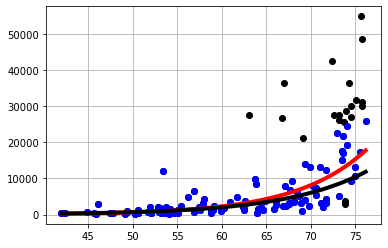

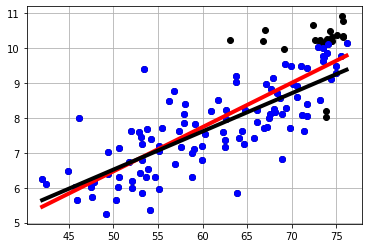

In [125]:
process_remove_data('./data/worldbank-gdp.csv',
            './data/gapminder-life-expectancy.csv',
            '1980')

# Introducing SciKit Learn

In [47]:
def process_life_expectancy_data_sklearn(filename, country, min_date, max_date,print_diff=False):
    
    df = pd.read_csv(filename, index_col="Life expectancy")
    
    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df.loc[country, str(min_date):str(max_date)]
    
    # create a list with the numerical range of min_date to max_date
    # we could use the index of life_expectancy but it will be a string
    # we need numerical data
    x_data = list(range(min_date, max_date+1))
    
    # calculate a line of best fit
    x_data_arr = np.array(x_data).reshape(-1,1)
    life_exp_arr = np.array(life_expectancy).reshape(-1,1)

    regression = skl_lin.LinearRegression().fit(x_data_arr, life_exp_arr)
    
    m = regression.coef_[0][0]
    c = regression.coef_[0]
    
    print('m=', m, 'c=', c)
    
    linear_data = regression.predict(x_data_arr)
    
    error = math.sqrt(skl_metrics.mean_squared_error(life_exp_arr, linear_data))
    print('Error is ', error)
    
    if print_diff:
        # print the difference in the predicted and measured values
        #print(x_data_arr.type)
        for n in range(len(x_data)):
            print('Year:', x_data[n], 'Difference:', (life_expectancy[n]-linear_data[n]))
    
    plt.plot(x_data,life_expectancy,'o')
    plt.plot(x_data,linear_data)
    plt.grid()


m= 0.1679411764705882 c= [0.16794118]
Error is  0.17465301735322844
Year: 2001 Difference: [-0.25294118]
Year: 2002 Difference: [-0.22088235]
Year: 2003 Difference: [-0.18882353]
Year: 2004 Difference: [0.04323529]
Year: 2005 Difference: [0.07529412]
Year: 2006 Difference: [0.20735294]
Year: 2007 Difference: [0.23941176]
Year: 2008 Difference: [0.17147059]
Year: 2009 Difference: [0.10352941]
Year: 2010 Difference: [0.13558824]
Year: 2011 Difference: [0.16764706]
Year: 2012 Difference: [0.09970588]
Year: 2013 Difference: [0.03176471]
Year: 2014 Difference: [-0.13617647]
Year: 2015 Difference: [-0.20411765]
Year: 2016 Difference: [-0.27205882]


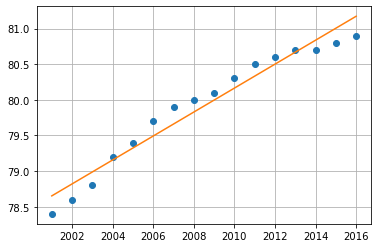

In [49]:
process_life_expectancy_data_sklearn("./data/gapminder-life-expectancy.csv",
                            'Germany', 2001, 2016,print_diff=True)

## Other Regression Types

In [25]:
def process_life_expectancy_data_poly(filename, country, min_date, max_date,print_diff=False,
                                      predict=False,predict_min=3000,predict_max = 3010):
    '''
    filename: string, directory of life expectancy data
    
    country: string, country of interest
    
    min_date: integer, initial year of interest
    
    max_date: integer, final year of interest
    '''
    
    df = pd.read_csv(filename, index_col="Life expectancy")
    
    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df.loc[country, str(min_date):str(max_date)]
    
    # create a list with the numerical range of min_date to max_date
    # we could use the index of life_expectancy but it will be a string
    # we need numerical data
    x_data = list(range(min_date, max_date+1))
    
    # calculate a line of best fit
    x_data_arr = np.array(x_data).reshape(-1,1)
    life_exp_arr = np.array(life_expectancy).reshape(-1,1)

    regression = skl_lin.LinearRegression().fit(x_data_arr, life_exp_arr)
    
    m = regression.coef_[0][0]
    c = regression.coef_[0]
    
    print('m=', m, 'c=', c)
    
    linear_data = regression.predict(x_data_arr)
    
    #error = math.sqrt(skl_metrics.mean_squared_error(life_exp_arr, linear_data))
    #print('Error is ', error)
    
    
    # Fit a polynomial
    
    polynomial_features = skl_pre.PolynomialFeatures(degree=5)
    x_poly = polynomial_features.fit_transform(x_data_arr)
    
    polynomial_model = skl_lin.LinearRegression().fit(x_poly, life_exp_arr)
    polynomial_data = polynomial_model.predict(x_poly)
    
    if print_diff:
        # print the difference in the predicted and measured values
        #print(x_data_arr.type)
        for n in range(len(x_data)):
            print('Year:', x_data[n], 'Difference:', (life_expectancy[n]-linear_data[n]))
    
    if predict:
        # make some predictions for future dates
        predictions_x = np.array(list(range(predict_min,predict_max))).reshape(-1,1)
    
        predictions_polynomial = polynomial_model.predict(polynomial_features.fit_transform(predictions_x))
    
        predictions_linear = regression.predict(predictions_x)
    
    # calculate the rms error
    linear_error = math.sqrt(skl_metrics.mean_squared_error(life_exp_arr, linear_data))
    print('linear error is ', linear_error)
    
    polynomial_error = math.sqrt(
        skl_metrics.mean_squared_error(life_exp_arr, polynomial_data))
    
    print('polynomial error is ', polynomial_error)
    
    plt.plot(x_data,life_expectancy,'bo')
    plt.plot(x_data,linear_data,'k',label='Linear')
    plt.plot(x_data,polynomial_data,'r',label='Polynomial')
    plt.legend()
    plt.grid()
    
    if predict:
        plt.figure(2)
        plt.plot(predictions_x,predictions_linear,'k',label='Linear')
        plt.plot(predictions_x,predictions_polynomial,'r',label='Polynomial')
        plt.legend()

m= 0.6144425087108016 c= [0.61444251]
linear error is  4.876685684987519
polynomial error is  2.335072441004167


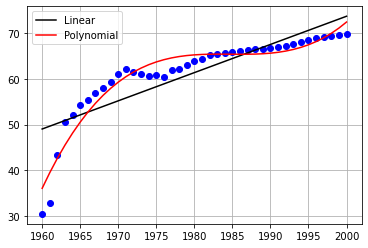

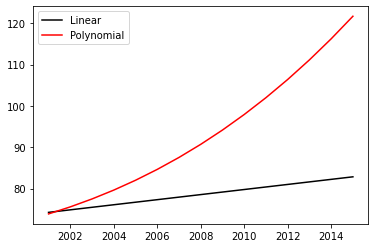

In [22]:
process_life_expectancy_data_poly("./data/gapminder-life-expectancy.csv",
                            'China', 1960, 2000,print_diff=False,
                                 predict=True,predict_min=2001,
                                 predict_max = 2016)

m= -0.07604355400696866 c= [-0.07604355]
linear error is  1.174227229162135
polynomial error is  1.063895013857909


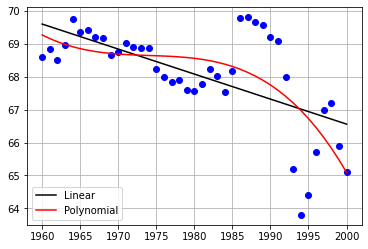

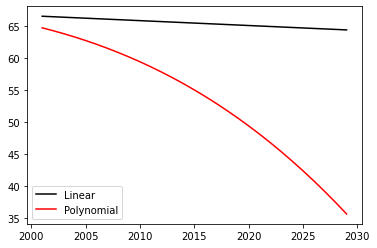

In [27]:
process_life_expectancy_data_poly("./data/gapminder-life-expectancy.csv",
                            'Russia', 1960, 2000,print_diff=False,predict=True,
                                 predict_min=2001,predict_max = 2030)

# Clustering

## K-means clustering with Make Blobs

In [48]:
data, cluster_id = skl_data.make_blobs(n_samples = 4000, cluster_std = 1.75, centers = 4, random_state = 10)

In [49]:
Kmean = skl_cluster.KMeans(n_clusters = 4)
Kmean.fit(data)
clusters = Kmean.predict(data)

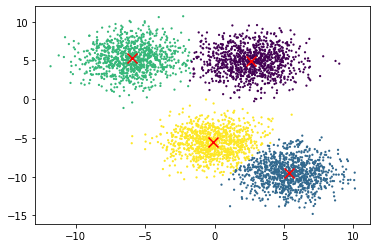

In [50]:
plt.scatter(data[:,0], data[:,1], s = 5, linewidth=0, c = clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s = 100, c='r', marker='x')